### plot compare

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
df = pd.read_csv('./local_output/fmri.csv')

In [336]:
df

,model name,model frequency,exceedance probability,protected exceedance probability
0,IO fixed freq,0.004631,0.00000,0.000029
1,IO fixed trans,0.004631,0.00000,0.000029
2,IO jump freq,0.563353,0.92378,0.923647
3,IO jump trans,0.339934,0.07622,0.076236
4,random,0.048434,0.00000,0.000029
5,RL,0.039017,0.00000,0.000029


In [331]:
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.replace('prob', 'probability')
df.replace('_', ' ', regex=True, inplace=True)
df.replace('io', 'IO', regex=True, inplace=True)
df.replace('rw', 'RL', regex=True, inplace=True)

In [332]:
dfs = df.sort_values('model frequency', ascending=False)

In [333]:
dfm = pd.melt(dfs, id_vars='model name', var_name='model evidence')

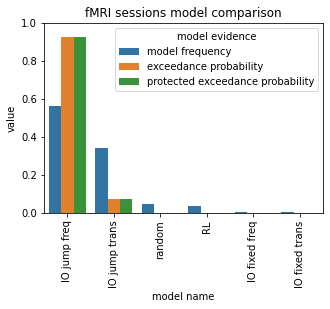

In [334]:
f, ax = plt.subplots(figsize=(5,3.5))
sns.barplot(data=dfm, x='model name', y='value', hue='model evidence', ax=ax)
plt.xticks(rotation=90)
plt.title('fMRI sessions model comparison')
plt.ylim(0,1)
plt.savefig('./figs/fmri_freq.png', bbox_inches='tight')

In [337]:
df = pd.read_csv('./local_output/practice.csv')

In [338]:
df

,model_name,model_frequency,exceedance_prob,protected_exceedance_prob
0,io_fixed_freq,0.004903,0.00000,0.000940
1,io_fixed_trans,0.004903,0.00000,0.000940
2,io_jump_freq,0.503897,0.97182,0.967281
3,io_jump_trans,0.154513,0.00389,0.004808
4,random,0.105289,0.00048,0.001417
5,rw,0.226495,0.02381,0.024615


In [217]:
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.replace('prob', 'probability')
df.replace('_', ' ', regex=True, inplace=True)
df.replace('io', 'IO', regex=True, inplace=True)
df.replace('rw', 'RL', regex=True, inplace=True)

In [218]:
dfs = df.sort_values('model frequency', ascending=False)

In [219]:
dfm = pd.melt(dfs, id_vars='model name', var_name='model evidence')

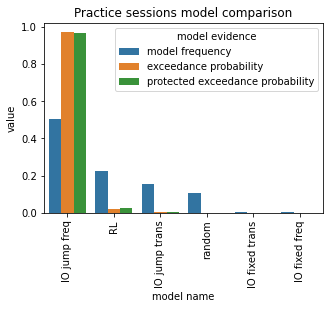

In [220]:
f, ax = plt.subplots(figsize=(5,3.5))
sns.barplot(data=dfm, x='model name', y='value', hue='model evidence', ax=ax)
plt.xticks(rotation=90)
plt.title('Practice sessions model comparison')
plt.savefig('./figs/practice_freq.png', bbox_inches='tight')

In [339]:
df = pd.read_csv('./local_output/subject_fmri.csv')

In [346]:
df.idxmax(axis=1).value_counts()

io_jump_freq     23
io_jump_trans    12
dtype: int64

In [327]:
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.replace('prob', 'probability')
# df.replace('_', ' ', regex=True, inplace=True)
df.columns = df.columns.str.replace('io', 'IO')
df.columns = df.columns.str.replace('rw', 'RL')

In [328]:
dfr = df[df.mean().sort_values(ascending=False).index]

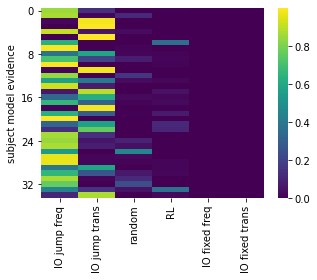

In [329]:
f, ax = plt.subplots(figsize=(5,3.5))
sns.heatmap(dfr, cmap = 'viridis', ax=ax)
plt.ylabel('subject model evidence')
ax.set_yticks(ax.get_yticks()[::4])
plt.savefig('./figs/fmri_subject.png', bbox_inches='tight')

In [347]:
df = pd.read_csv('./local_output/subject_practice.csv')

In [348]:
df.idxmax(axis=1).value_counts()

io_jump_freq     23
rw                6
io_jump_trans     4
dtype: int64

In [321]:
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.replace('prob', 'probability')
# df.replace('_', ' ', regex=True, inplace=True)
df.columns = df.columns.str.replace('io', 'IO')
df.columns = df.columns.str.replace('rw', 'RL')

In [322]:
df_tmp = pd.DataFrame([[0,0,0,0,0,0],
                       [0,0,0,0,0,0]])
df_tmp.columns = df.columns

In [323]:
dfn = pd.concat([df_tmp,df], axis=0).reset_index().drop(columns='index')

In [324]:
dfr = dfn[dfn.mean().sort_values(ascending=False).index]

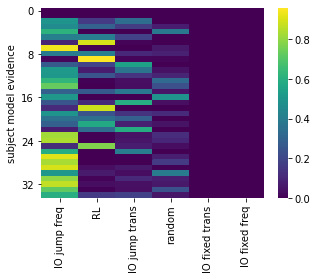

In [325]:
f, ax = plt.subplots(figsize=(5,3.5))
sns.heatmap(dfr, cmap = 'viridis', ax=ax)
plt.ylabel('subject model evidence')
ax.set_yticks(ax.get_yticks()[::4])
plt.savefig('./figs/practice_subject.png', bbox_inches='tight')